## Clustering

In Machine Learning, unsupervised learning is a class of problems in which one seeks to determine how the data are organized. It is different from supervised learning and reinforcement learning in that learner is given only unlabeled examples.
< to change>

Clustering is a method of unsupervised learning for performing statistical analysis used in many fields.
Clustering is about dividing the data set into sub sets, or clusters, wherein the observations should be similar to those in the same cluster but differ greatly from the observations in other clusters. 

http://www.cad.zju.edu.cn/home/zhx/csmath/lib/exe/fetch.php?media=2011:presentation_ml_by_ibrar.pdf

## Two common algorithms:
### 1. Hierarchical clustering
### 2. K-mean clustering

## 1. K-means clustering
K-means clustering is an algorithm to group your objects based on attributes into k number of groups and k > 0.
Grouping is done by minimizing the sum of squares of distances between data and the corresponding cluster centroid. 

http://www.cad.zju.edu.cn/home/zhx/csmath/lib/exe/fetch.php?media=2011:presentation_ml_by_ibrar.pdf

## 2. Hierarchical clustering
Hierarchical  (aka agglomerative) clustering tries to link each data point by a distance measure, to its nearest neighbour, creating a cluster. Reiterating the algorithm using different linkage methods, the algorithm gathers all the available points into a rapidly diminishing number of clusters, until in the end all the points reunite into a single group.


## Linkage methods

https://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/

### 1. Ward
This looks for spherical clusters, very cohesive inside and extremely differentiated from other groups. 
This finds clusters of similar size and works well with Euclidean distance.

### 2. Complete
This looks for most dissimilar data points and links clusters. Clusters created using this method comprises highly similar observations, making the clusters compact.

### 3. Average
This looks for centroids of data points, ignoring their boundaries and links clusters. 
These clusters are can be of different sizes and shapes making it attractive technique to be used in the field of biological sciences.

## Three distance metrics

### 1) Euclidean distance or l2

The Euclidean distance between points a and b is the length of the line segment connecting them .
$d_{Euc}{(a,b)}$ = $\sqrt{(\sum(a_i - b_i)}^2$

### 2) Manhattan or l1

The Manhattan distance between points is calculate by adding the absolute value of the difference between the dimensions.

$d_{Manhattan}{(a,b)}$ = ${\sum{|(a_i - b_i)|}}$

### 3) Cosine

Cosine distance is squared Euclidean distance with the data normalized to unit length.


In [23]:
# needed imports
import pandas as pd
import numpy  as np
import sklearn
import sklearn.datasets

from   sklearn.cluster         import AgglomerativeClustering
from   matplotlib              import pyplot as plt
from   scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [25]:
data     =  sklearn.datasets.load_iris()
x        =  pd.DataFrame(data.data, columns = list(data.feature_names))

In [26]:
n_clusters = 3 

In [27]:
Hclustering = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'cosine', linkage = 'complete')

In [28]:
Hclustering.fit(x)
ms          = np.column_stack((data.target,Hclustering.labels_))
df          = pd.DataFrame(ms, columns = ['Actual', 'Clusters'])
pd.crosstab(df['Actual'], df['Clusters'], margins=True)

Clusters,0,1,2,All
Actual,,,,
0,50,0,0,50
1,0,50,0,50
2,0,24,26,50
All,50,74,26,150


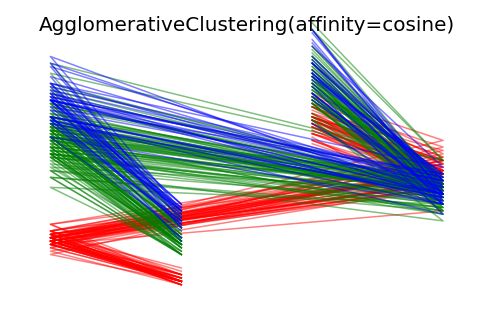

In [29]:
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c in zip(np.arange(n_clusters), 'rgbk'):
    plt.plot(x[Hclustering.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % 'cosine', size=20)

{'color_list': ['g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.8732124598286494, 0.8732124598286494, 0.0],
  [0.0, 0.8634279428533687, 0.8634279428533687, 0.8732124598286494],
  [0.0, 1.3241042078042804, 1.3241042078042804, 0.8634279428533687],
  [0.0, 0.75216651167707, 0.75216651167707, 0.0],
  [0.0, 0.9597612814830203, 0.9597612814830203, 0.75216651167707],
  [0.0, 1.1761462826764981, 1.1761462826764981, 0.9597612814830203],
  [0.0, 1.4148438371524543, 1.4148438371524543, 1.1761462826764981],
  [0.0, 1.0448160723304367, 1.0448160723304367, 0.0],
  [0.0, 1.4703823664865878, 1.4703823664865878, 1.0448160723304367],
  [1.4148438371524543,
   2.885892034309589,
   2.885892034309589,
   1.4703823664865878],
  [1.3241042078042804,
   4.305009680873366,
   4.305009680873366,
   2.885892034309589]],
 'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.

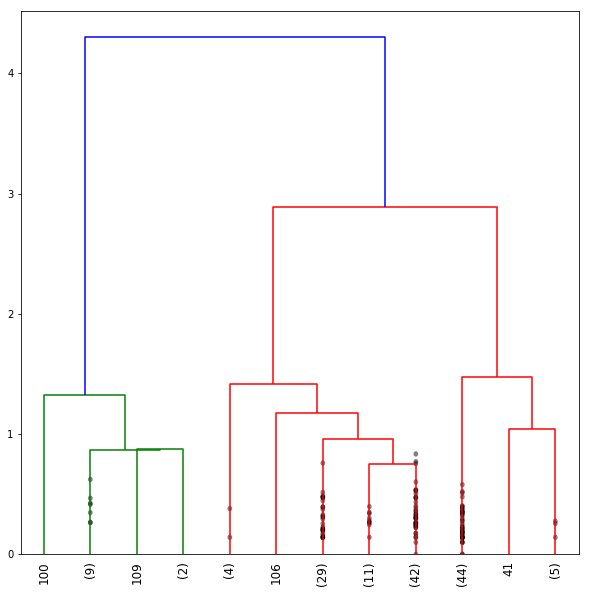

In [40]:
z = linkage(x, 'median')
plt.figure(figsize = (10, 10))
dendrogram(
 z,
 truncate_mode   = 'lastp',
 p               = 12,
 leaf_rotation   = 90.,
 leaf_font_size  = 12.,
 show_contracted = True,
)

In [19]:
for _, metric in enumerate(['euclidean', 'l1', 'l2', 'manhattan', 'cosine']):
    for _, linkage_v in enumerate(['ward', 'complete', 'average']):
        
        try:
            Hclustering = AgglomerativeClustering(n_clusters = n_clusters, affinity = metric, linkage = linkage_v)
            Hclustering.fit(x)
            ms  = np.column_stack((data.target, Hclustering.labels_))
            df  = pd.DataFrame(ms, columns = ['Actual', 'Clusters'])
            print('\naffinity %s linkage %s' %(metric, linkage_v))
            print(pd.crosstab(df['Actual'], df['Clusters'], margins = True))
            
        except:
            print("\nError %s %s" % (metric, linkage_v))


affinity euclidean linkage ward
Clusters   0   1   2  All
Actual                   
0          0  50   0   50
1         49   0   1   50
2         15   0  35   50
All       64  50  36  150

affinity euclidean linkage complete
Clusters   0   1   2  All
Actual                   
0          0  50   0   50
1         23   0  27   50
2         49   0   1   50
All       72  50  28  150

affinity euclidean linkage average
Clusters   0   1   2  All
Actual                   
0          0  50   0   50
1         50   0   0   50
2         14   0  36   50
All       64  50  36  150

Error l1 ward

affinity l1 linkage complete
Clusters   0   1   2  All
Actual                   
0          0   0  50   50
1         50   0   0   50
2         16  34   0   50
All       66  34  50  150

affinity l1 linkage average
Clusters   0   1   2  All
Actual                   
0          0  50   0   50
1         49   0   1   50
2         14   0  36   50
All       63  50  37  150

Error l2 ward

affinity l2 linkage comp

In [ ]:
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = cluster.AgglomerativeClustering(n_clusters  = n_clusters,
                                    linkage = "average", affinity = metric)
    model.fit(x)


In [ ]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)  

In [ ]:
print(cluster.labels_)  

In [ ]:
print(data.target)

In [ ]:
results      = model.fit(x)
results.fit_predict(x)
x["cluster"]  = cluster.labels_
x["target"]   =  data.target
x["count"]    =  'c'

In [ ]:
classification_result = x[["cluster", "target", "count"]].groupby(["cluster", "target"]).agg("count")
print(classification_result)